<a href="https://colab.research.google.com/github/Lud-lud/segmentacao_estudantes_clustering_analysis/blob/main/analise_clustering_notas_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de alunos por meio de método de clusterização k-means


In [ ]:
import pandas as pd
import numpy as np

# Configurar número de alunos e disciplinas
num_alunos = 90
disciplinas = ["Língua Portuguesa",
               "Língua Estrangeira",
               "Educação Física",
               "Matemática",
               "Geografia",
               "História",
               "Ciências",
               "Ensino Religioso",
               "Artes",
               "Tecnologia e Informática"]

# Proporção de alunos em cada grupo
proporcoes = [0.3, 0.3, 0.2, 0.2]  # Grupos 1, 2, 3, 4
alunos_por_grupo = [int(num_alunos * p) for p in proporcoes]

# Gerar dados
np.random.seed(42)  # Para reprodutibilidade
dados = {
    "Aluno": [f"Aluno_{i+1}" for i in range(num_alunos)],
}

# Inicializar listas de notas
notas = {disciplina: [] for disciplina in disciplinas}

# Grupo 1: Notas altas em humanas, baixas em exatas
for _ in range(alunos_por_grupo[0]):
    for disciplina in disciplinas:
        if disciplina in ["Língua Portuguesa", "Língua Estrangeira", "Educação Física", "História", "Geografia", "Ensino Religioso", "Artes"]:
            notas[disciplina].append(np.random.uniform(6, 10))  # Notas altas
        else:
            notas[disciplina].append(np.random.uniform(0, 5))  # Notas baixas

# Grupo 2: Notas altas em exatas, baixas em humanas
for _ in range(alunos_por_grupo[1]):
    for disciplina in disciplinas:
        if disciplina in ["Matemática", "Ciências", "Tecnologia e Informática"]:
            notas[disciplina].append(np.random.uniform(6, 10))  # Notas altas
        else:
            notas[disciplina].append(np.random.uniform(0, 5))  # Notas baixas

# Grupo 3: Bons em todas as matérias
for _ in range(alunos_por_grupo[2]):
    for disciplina in disciplinas:
        notas[disciplina].append(np.random.uniform(6, 10))  # Notas altas

# Grupo 4: Ruins em todas as matérias
for _ in range(alunos_por_grupo[3]):
    for disciplina in disciplinas:
        notas[disciplina].append(np.random.uniform(0, 5))  # Notas baixas

# Adicionar as notas ao dicionário de dados
for disciplina in disciplinas:
    dados[disciplina] = notas[disciplina]

# Criar DataFrame
df = pd.DataFrame(dados)

# Mostrar as primeiras linhas do DataFrame
print(df.head())

# Salvar como CSV (opcional)
# df.to_csv("notas_alunos_9ano.csv", index=False)


     Aluno  Língua Portuguesa  Língua Estrangeira  Educação Física  \
0  Aluno_1           7.498160            9.802857         8.927976   
1  Aluno_2           6.082338            9.879639         9.329771   
2  Aluno_3           8.447412            6.557975         7.168579   
3  Aluno_4           8.430179            6.682096         6.260206   
4  Aluno_5           6.488153            7.980708         6.137554   

   Matemática  Geografia  História  Ciências  Ensino Religioso     Artes  \
0    2.993292   6.624075  6.623978  0.290418          9.464705  8.404460   
1    1.061696   6.727300  6.733618  1.521211          8.099026  7.727780   
2    1.831809   7.824280  9.140704  0.998369          8.056938  8.369658   
3    4.744428   9.862528  9.233589  1.523069          6.390688  8.736932   
4    4.546602   7.035120  8.650089  1.558555          8.080272  8.186841   

   Tecnologia e Informática  
0                  3.540363  
1                  1.456146  
2                  0.232252  
3 

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('dados_sisu_2022_morrinhos.csv')

É importante ressaltar que, ao lidar com dados reais, é de suma importância fazer a verificação da presença de outliers, pois a análise de clustering é extremamente sensível a valores discrepantes. Com dados simulados, não é necessário.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cpf                          782 non-null    object 
 1   inscricao_enem               782 non-null    object 
 2   candidato                    782 non-null    object 
 3   data_nascimento              782 non-null    object 
 4   sigla_uf_candidato           782 non-null    object 
 5   id_municipio_candidato       782 non-null    int64  
 6   id_municipio_candidato_nome  782 non-null    object 
 7   nota_l                       782 non-null    float64
 8   nota_ch                      782 non-null    float64
 9   nota_cn                      782 non-null    float64
 10  nota_m                       782 non-null    float64
 11  nota_r                       782 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 73.4+ KB


In [5]:
df.describe()

,id_municipio_candidato,nota_l,nota_ch,nota_cn,nota_m,nota_r
count,782.0,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5213806.0,529.294373,552.985166,520.622762,574.070077,755.473146
std,0.0,77.834090,90.593001,92.627702,114.229734,147.576126
min,5213806.0,325.100000,352.200000,344.400000,355.800000,340.000000
25%,5213806.0,478.075000,487.900000,444.500000,479.300000,645.000000
50%,5213806.0,534.600000,558.900000,512.100000,568.400000,760.000000
75%,5213806.0,583.300000,621.500000,585.300000,656.525000,880.000000
max,5213806.0,718.000000,745.500000,735.600000,844.800000,980.000000


In [7]:
import plotly.express as px

fig = px.scatter_3d(df,
                   x='nota_l',
                   y='nota_m',
                   z='nota_r')
fig.show()

Pela análise do gráfico 3D com apenas 3 variáveis já é possível observar a formação de grupos bem distintos, ou seja, distantes entre si, embora existam observações entre os grupos que estão bastante próximas entre si.

Vamos prosseguir com as análises selecionando apenas os dados quantitativos para utilizar no algoritmo de clusterização.

In [9]:
df_num = df[['nota_ch', 'nota_m', 'nota_r', 'nota_cn', 'nota_l']]

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nota_ch  782 non-null    float64
 1   nota_m   782 non-null    float64
 2   nota_r   782 non-null    float64
 3   nota_cn  782 non-null    float64
 4   nota_l   782 non-null    float64
dtypes: float64(5)
memory usage: 30.7 KB


Neste caso, como todas as variáveis a serem utilizadas são notas que variam de 0 a 10, não é necessário fazer a padronização dos dados. Caso as variáveis apresentem escalas diferentes, é indispensável a realização da padronização, que pode ser feita com o procedimento z-scores.

In [11]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.7 MB/s eta 0:00:00


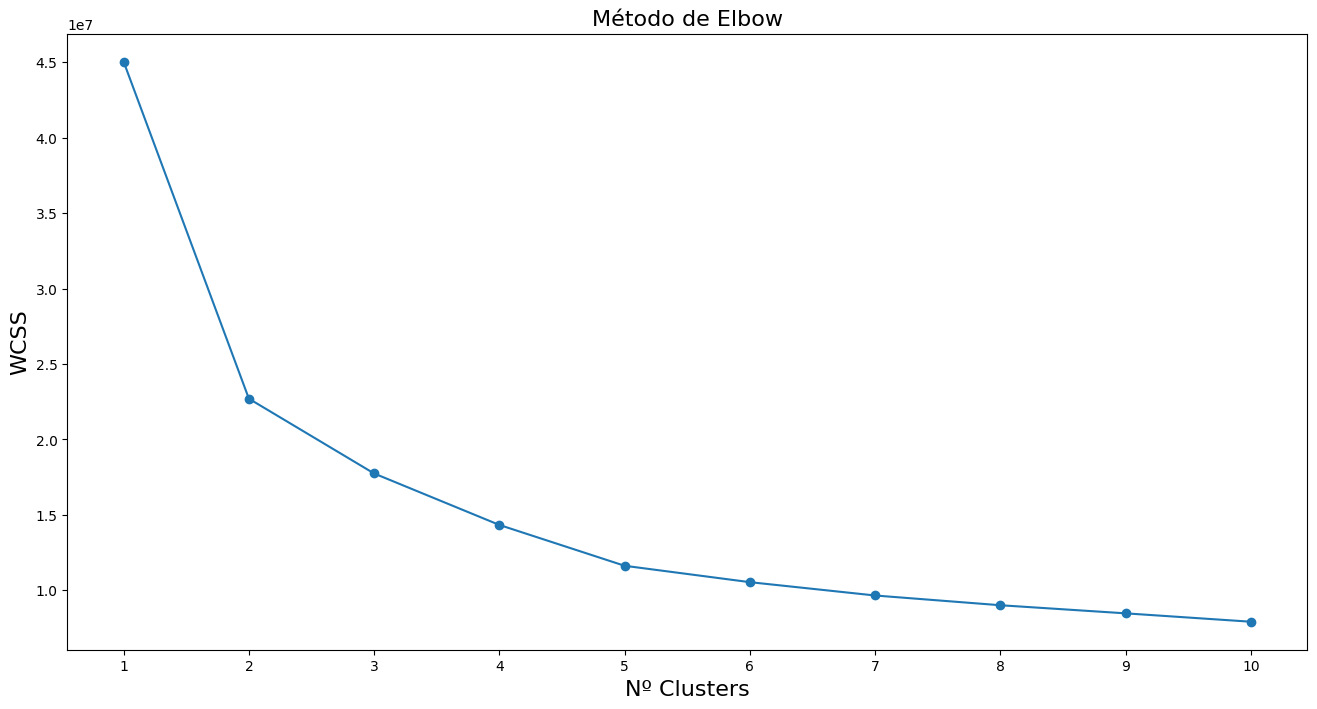

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(df_num)
    elbow.append(kmeanElbow.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

A análise da figura acima mostra que o número ideal de clusters é 2. Podemos utilizar o método da silhueta para a qualidade da formação de clusters com cada número de cluster. Quanto maior o valor, menores são as distâncias dentro dos clusters e maiores são as distâncias entre clusters.

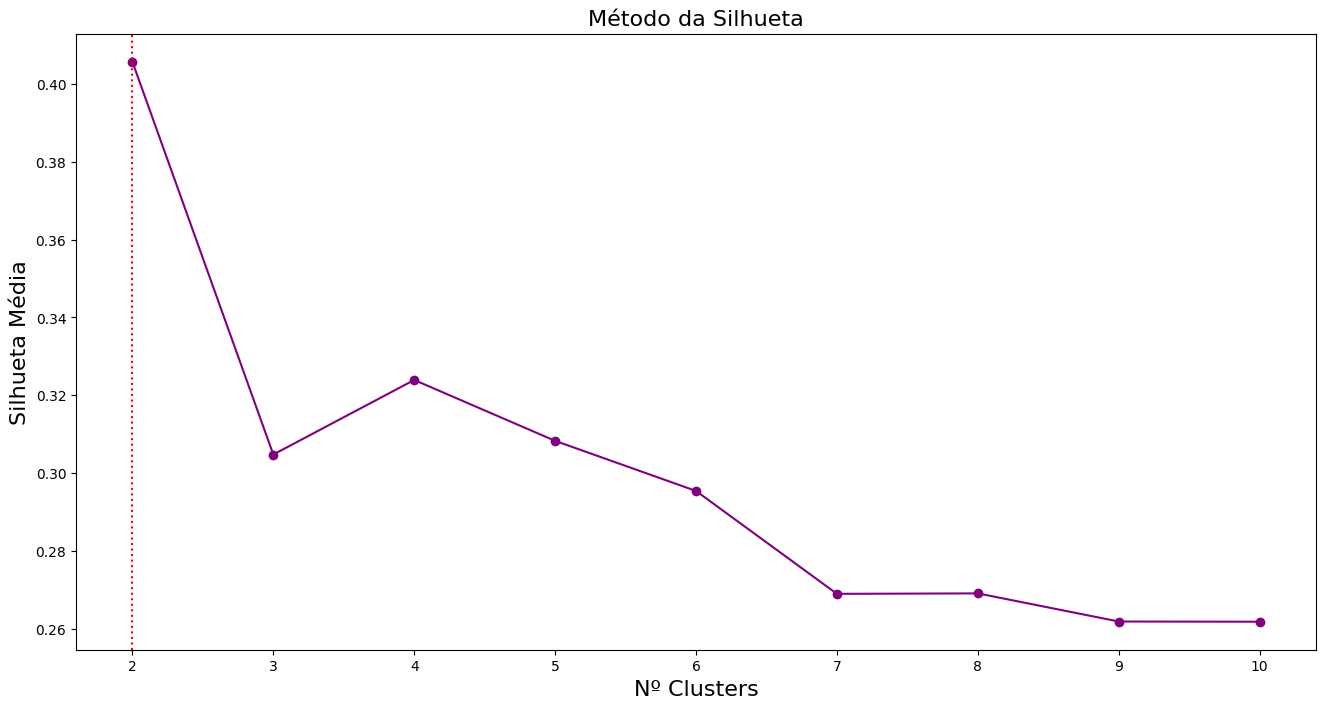

In [13]:
from sklearn.metrics import silhouette_score

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I:
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(df_num)
    silhueta.append(silhouette_score(df_num, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red')
plt.show()


A silhueta mostra que com 2 clusters, a qualidade é melhor. Entretanto, quanto menor o número de clusters, mais heterogêneos serão as observações dentro dos clusters. Como o objetivo é maximizar a homogeneidade dentro dos clusters, então é interessante adotar um número maior. A figura sugere que 4 clusters também teria boa qualidade.

Outra forma de definir o número de clusters é realizando uma clusterização por meio do esquema de aglomeração hierárquico. Isto é bastante útil para quando não se tem uma ideia sobre quantos clusters pode-se obter a partir dos dados. Neste projeto, Vamos testar o método de encadeamento médio (Average Linkage ou Between Groups), que se comporta de acordo com a proximidade das observações. Neste caso, como há algumas observações próximas entre si (conforme visualizado no gráfico 3D), ele irá se comportar como o dendograma feito com o método de encadeamento Complete Linkage ao invés do Single Linkage (o qual é ideal para quando as observações estão mais distantes entre si). Como medida de distância, vamos utilizar a euclidiana, a mais utilizada para este tipo de análise.

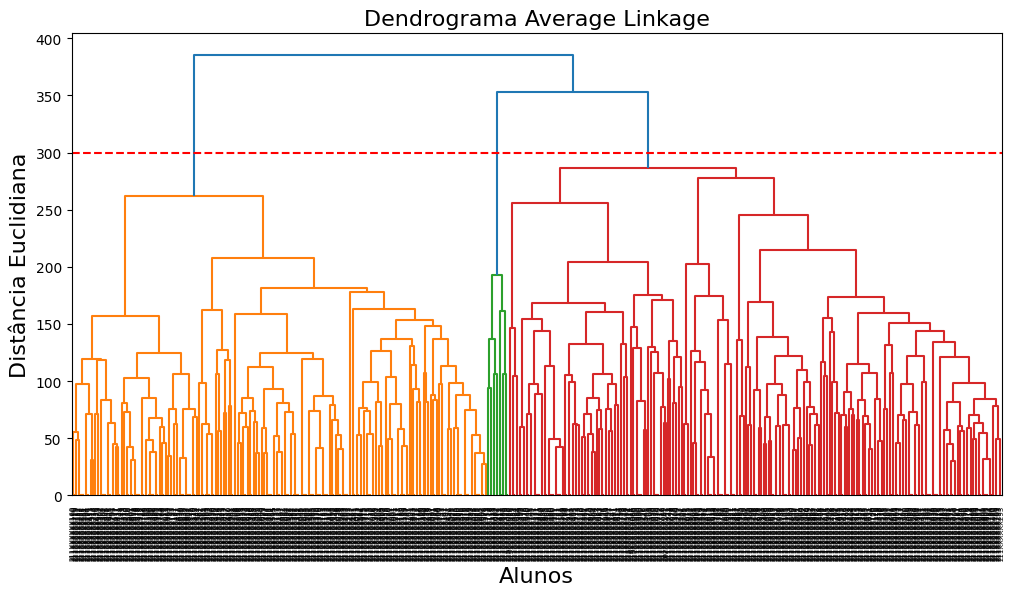

In [71]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'average', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 300, labels = list(df.inscricao_enem))
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 300, color = 'red', linestyle = '--')
plt.show()

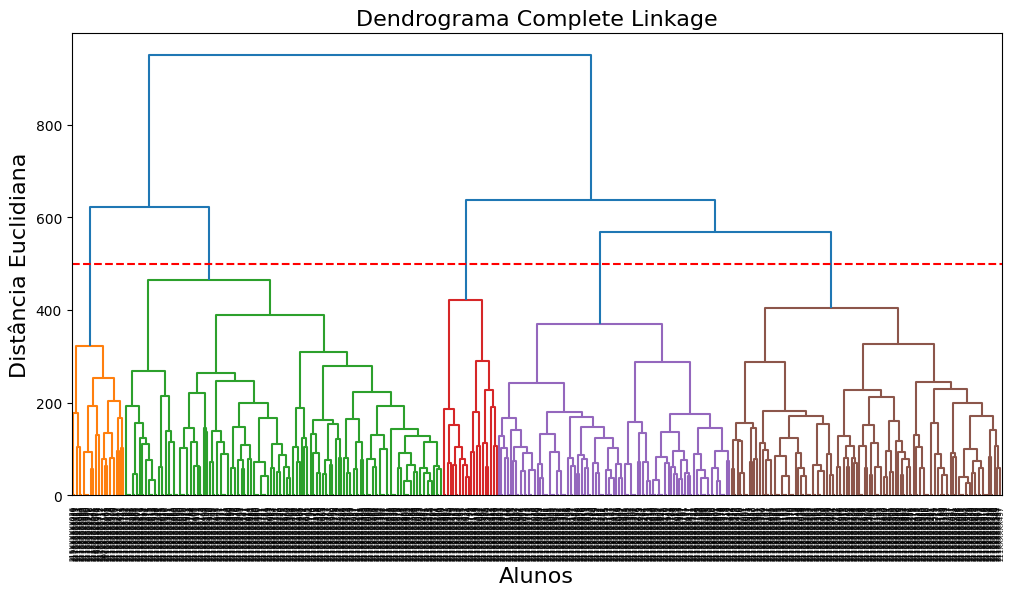

In [70]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'complete', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 500, labels = list(df.inscricao_enem))
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 500, color = 'red', linestyle = '--')
plt.show()

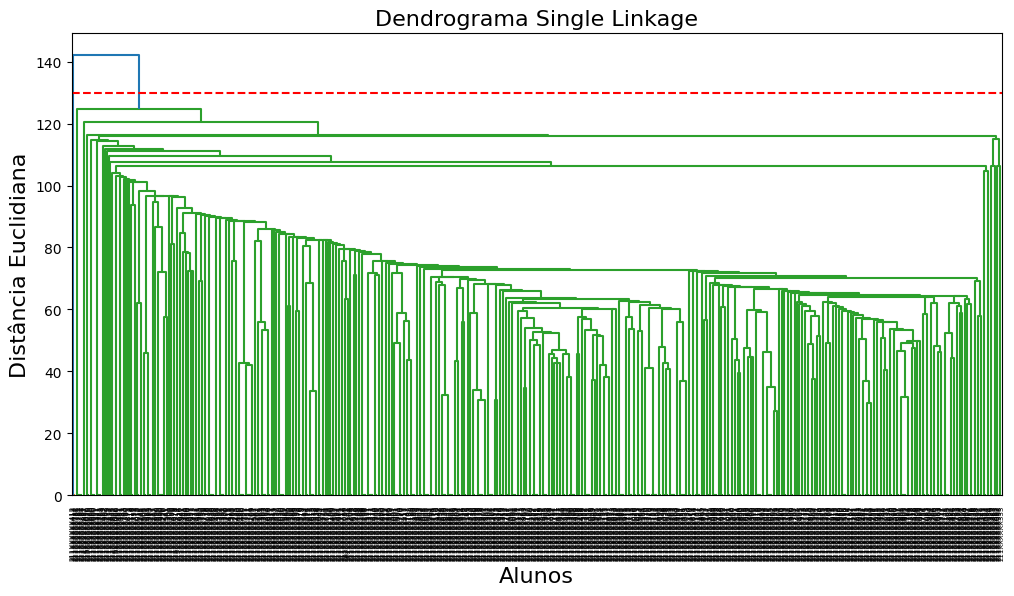

In [69]:
plt.figure(figsize=(12,6))
dend_sing = sch.linkage(df_num, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 130, labels = list(df.inscricao_enem))
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Alunos', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 130, color = 'red', linestyle = '--')
plt.show()

Apesar do dendograma gerado pelo método de encadeamento Single Linkage demonstrar a formação de 3 clusters, os dois dendogramas anteriores sugerem a formação de 4 clusters. Portanto, vamos manter 4 clusters na análise de clustering k-means.

In [45]:
kmeans_final = KMeans(n_clusters = 5, init = 'random', random_state=100).fit(df_num)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
df['cluster_kmeans'] = kmeans_clusters


In [24]:
df.head()

,cpf,inscricao_enem,candidato,data_nascimento,sigla_uf_candidato,id_municipio_candidato,id_municipio_candidato_nome,nota_l,nota_ch,nota_cn,nota_m,nota_r,cluster_kmeans
0,XXX.834263-XX,211XXXXXX480,GIOVANA GOMES DE CARVALHO,2003-02-17,GO,5213806,Morrinhos,350.8,431.5,432.4,421.0,580.0,1
1,XXX.834263-XX,211XXXXXX480,GIOVANA GOMES DE CARVALHO,2003-02-17,GO,5213806,Morrinhos,350.8,431.5,432.4,421.0,580.0,1
2,XXX.906261-XX,211XXXXXX916,BRENDA LAURA DE SOUZA,2003-05-29,GO,5213806,Morrinhos,521.2,595.9,561.1,633.7,800.0,0
3,XXX.906261-XX,211XXXXXX916,BRENDA LAURA DE SOUZA,2003-05-29,GO,5213806,Morrinhos,521.2,595.9,561.1,633.7,800.0,0
4,XXX.085411-XX,211XXXXXX109,ANDRESSA DANDARA GONTIJO DE LIMA,2003-09-24,GO,5213806,Morrinhos,428.4,448.2,393.4,613.5,580.0,1


In [ ]:
df.to_excel('notas_alunos_9ano.xlsx', index=False)

In [55]:
pal = {'0': '#ef476f', '1': '#ffd166', '2': '#06d6a0', '3': '#118ab2', '4': '#7b1e7a'}

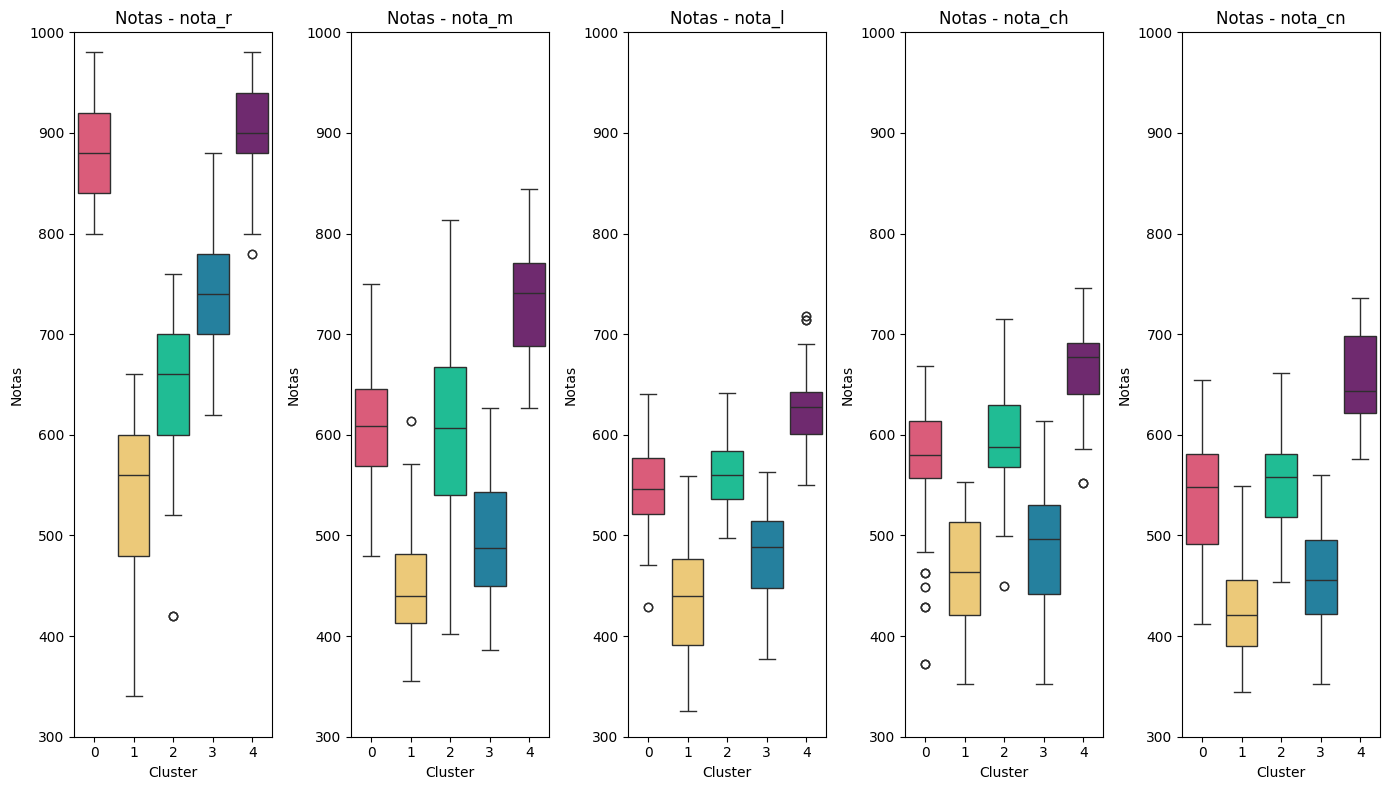

In [56]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5, figsize=(14, 8))  # Grade de 5x2 para os subplots
axes = axes.flatten()  # Transforma os eixos em uma lista para iteração

disciplinas = ['nota_r',
                'nota_m',
                'nota_l',
                'nota_ch',
                'nota_cn']

for i, disciplina in enumerate(disciplinas):
    sns.boxplot(
        x=df["cluster_kmeans"],
        y=df[disciplina],
        ax=axes[i],
        palette=pal
    )
    axes[i].set_title(f'Notas - {disciplina}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Notas')
    axes[i].set_ylim(300, 1000)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Com os boxplots é possível visualizar a variabilidade entre os grupos e dentro dos grupos. Observa-se o seguinte padrão:
*  Cluster 0: Alto a médio desempenho em Humanas e baixo desempenho em Exatas;
*  Cluster 1: Alto desempenho em Humanas, com alto a médio desempenho em Exatas;
*  Cluster 2: Baixo desempenho em todas as disciplinas;
*  Cluster 3: Alto a médio desempenho em todas as disciplinas.

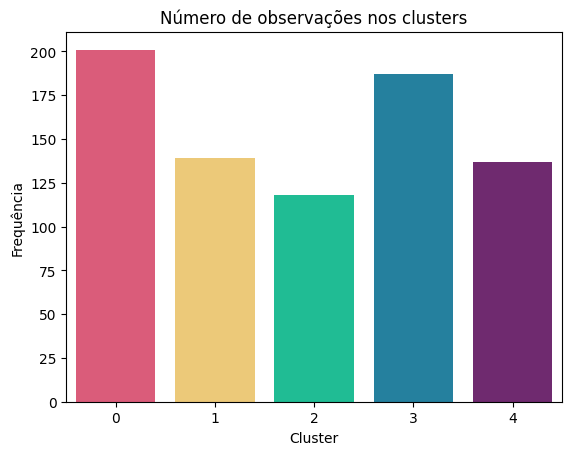

In [57]:
sns.countplot(x=df["cluster_kmeans"].sort_values().astype(str),
              palette=pal, dodge=False)
plt.title("Número de observações nos clusters")
plt.xlabel("Cluster")
plt.ylabel("Frequência")
plt.show()

Avaliar quais disciplinas contribuíram para a formação dos grupos por meio do teste estatístico F de análise de variância de um fator (ANOVA one-way), que nos diz se pelo menos 1 cluster é estatisticamente diferente dos demais considerando cada variável.



In [58]:
import pingouin as pg

p_valor = pd.DataFrame({'Disciplina': df_num.columns, 'p_valor': [None] * len(df_num.columns)})

for i, coluna in enumerate(df_num.columns):
    anova = pg.anova(dv=coluna,
                     between='cluster_kmeans',
                     data=df,
                     detailed=True)
    p_val = anova['p-unc'].iloc[0]  # Seleciona o primeiro valor de p-unc
    p_valor.loc[i, 'p_valor'] = p_val

print(p_valor)


  Disciplina p_valor
0    nota_ch     0.0
1     nota_m     0.0
2     nota_r     0.0
3    nota_cn     0.0
4     nota_l     0.0


Todas as variáveis contribuíram para a formação dos grupos.
Agora vamos gerar um scatterplot para visualização das observações dentro dos clusters e seus respectivos centroides.

In [59]:
centroides = pd.DataFrame(kmeans_final.cluster_centers_)
centroides.columns = df_num.columns
centroides.index.name = 'cluster'
centroides

,nota_ch,nota_m,nota_r,nota_cn,nota_l
cluster,,,,,
0,576.085075,604.235821,881.293532,537.908955,554.028358
1,460.151799,451.545324,540.863309,424.900000,435.999281
2,594.869492,599.509322,644.745763,553.474576,562.687288
3,485.385561,494.950802,743.957219,453.793583,479.934225
4,669.478102,740.209489,899.708029,655.305109,626.275912


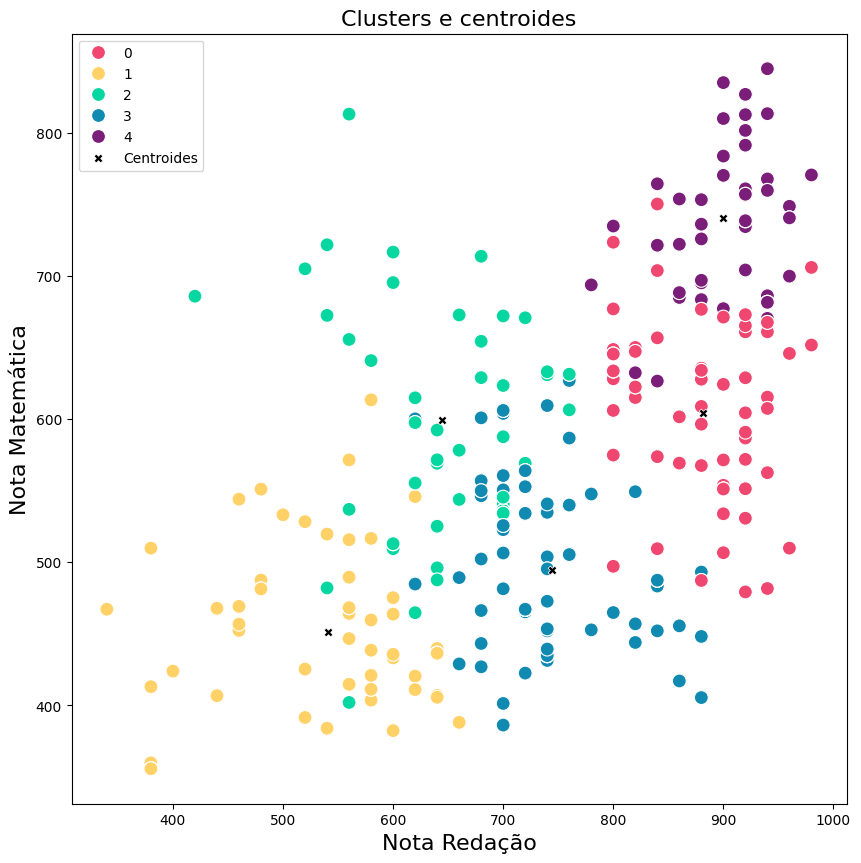

In [68]:
import seaborn as sns
pal = {0: '#ef476f', 1: '#ffd166', 2: '#06d6a0', 3: '#118ab2', 4: '#7b1e7a'}

plt.figure(figsize=(10,10))
sns.scatterplot(x='nota_r', y='nota_m', data=df, hue='cluster_kmeans', palette=pal, s=100)
sns.scatterplot(x='nota_r', y='nota_m', data=centroides, s=40, c='black', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Nota Redação', fontsize=16)
plt.ylabel('Nota Matemática', fontsize=16)
plt.legend(loc='upper left')
plt.show()

Vamos gerar uma visualização 3D dos clusters.

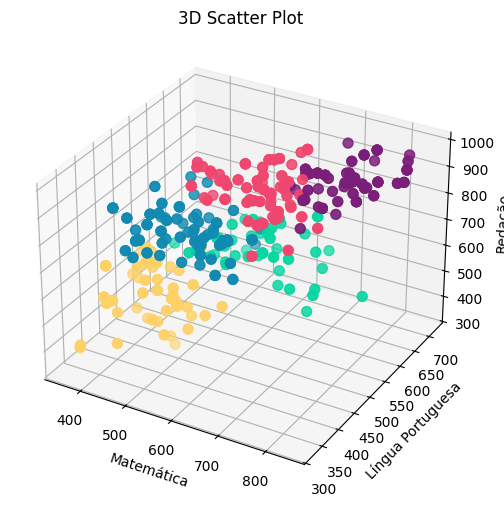

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Mapear as cores para cada ponto
cores = df["cluster_kmeans"].map(pal)

# Dados do gráfico
x = df['nota_m']
y = df['nota_l']
z = df['nota_r']

# Criar o gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')

# Scatter plot com cores personalizadas
ax.scatter(x, y, z, s=50, c=cores, marker='o')

# Personalizar o gráfico
ax.set_xlabel('Matemática')
ax.set_ylabel('Língua Portuguesa')
ax.set_zlabel('Redação')
plt.title("3D Scatter Plot")

# Salvar e exibir
plt.savefig('3d_scatterplot.png')
plt.show()


Agora, vamos caracterizar os grupos para que seja possível descrevê-los melhor. Para isso, primeiramente vou categorizar as notas dos alunos com base em classes e, em seguida, calcular o percentual dessas classes dentro dos clusters.
O critério de categorização é totalmente arbitrário, devendo ser discutido sobre o significado e os limites que façam mais sentido para as metas da instituição:
*  Baixo desempenho: notas de 0 a menos de 5;
*  Médio desempenho: notas de 5 a menos de 7;
*  Alto desempenho: notas de 7 a 10.

In [ ]:
df_class = df.copy()

for coluna in df_class.columns[1:11]:
  df_class[coluna] = df_class[coluna].apply(
      lambda valor: "Baixo desempenho" if valor <= 5
      else "Médio desempenho" if valor > 5 and valor < 7
      else "Alto desempenho"
  )

In [ ]:
df_class.head()

,Aluno,Língua Portuguesa,Língua Estrangeira,Educação Física,Matemática,Geografia,História,Ciências,Ensino Religioso,Artes,Tecnologia e Informática,cluster_kmeans
0,Aluno_1,Alto desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,Médio desempenho,Médio desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,0
1,Aluno_2,Médio desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,Médio desempenho,Médio desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,0
2,Aluno_3,Alto desempenho,Médio desempenho,Alto desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,0
3,Aluno_4,Alto desempenho,Médio desempenho,Médio desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,Médio desempenho,Alto desempenho,Baixo desempenho,0
4,Aluno_5,Médio desempenho,Alto desempenho,Médio desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,Alto desempenho,Alto desempenho,Baixo desempenho,0


In [ ]:
for disciplina in df_class.columns[1:11]:
  for cl in df_class.cluster_kmeans.unique():
    # Calculate the percentage of each performance category
    vc = 100*df_class.loc[df_class.cluster_kmeans==cl,disciplina].value_counts()/(df.cluster_kmeans==cl).sum()

    # Iterate through categories and percentages
    for cat,cnt in vc.reset_index().values:
      # Print cluster, subject, and percentage of each category instead of mean
      print(f'{cl:d}; {disciplina}; {cat}; {cnt:.2f}%'.replace('.',','))

0; Língua Portuguesa; Alto desempenho; 81,48%
0; Língua Portuguesa; Médio desempenho; 18,52%
1; Língua Portuguesa; Baixo desempenho; 100,00%
3; Língua Portuguesa; Alto desempenho; 61,11%
3; Língua Portuguesa; Médio desempenho; 38,89%
2; Língua Portuguesa; Baixo desempenho; 100,00%
0; Língua Estrangeira; Alto desempenho; 66,67%
0; Língua Estrangeira; Médio desempenho; 33,33%
1; Língua Estrangeira; Baixo desempenho; 100,00%
3; Língua Estrangeira; Alto desempenho; 83,33%
3; Língua Estrangeira; Médio desempenho; 16,67%
2; Língua Estrangeira; Baixo desempenho; 100,00%
0; Educação Física; Alto desempenho; 70,37%
0; Educação Física; Médio desempenho; 29,63%
1; Educação Física; Baixo desempenho; 100,00%
3; Educação Física; Alto desempenho; 61,11%
3; Educação Física; Médio desempenho; 38,89%
2; Educação Física; Baixo desempenho; 100,00%
0; Matemática; Baixo desempenho; 100,00%
1; Matemática; Alto desempenho; 81,48%
1; Matemática; Médio desempenho; 18,52%
3; Matemática; Alto desempenho; 66,67%
3

In [ ]:
for disciplina in df_class.columns[1:11]:

    # Calculate the percentage of each performance category
    vc = 100*df_class.loc[:,disciplina].value_counts()/(df_class.shape[0])

    # Iterate through categories and percentages
    for cat,cnt in vc.reset_index().values:
      # Print cluster, subject, and percentage of each category instead of mean
      print(f'All; {disciplina}; {str(cat):s}; {cnt:5.2f}%'.replace('.',','))

All; Língua Portuguesa; Baixo desempenho; 50,00%
All; Língua Portuguesa; Alto desempenho; 36,67%
All; Língua Portuguesa; Médio desempenho; 13,33%
All; Língua Estrangeira; Baixo desempenho; 50,00%
All; Língua Estrangeira; Alto desempenho; 36,67%
All; Língua Estrangeira; Médio desempenho; 13,33%
All; Educação Física; Baixo desempenho; 50,00%
All; Educação Física; Alto desempenho; 33,33%
All; Educação Física; Médio desempenho; 16,67%
All; Matemática; Baixo desempenho; 50,00%
All; Matemática; Alto desempenho; 37,78%
All; Matemática; Médio desempenho; 12,22%
All; Geografia; Baixo desempenho; 50,00%
All; Geografia; Alto desempenho; 35,56%
All; Geografia; Médio desempenho; 14,44%
All; História; Baixo desempenho; 50,00%
All; História; Alto desempenho; 36,67%
All; História; Médio desempenho; 13,33%
All; Ciências; Baixo desempenho; 50,00%
All; Ciências; Alto desempenho; 35,56%
All; Ciências; Médio desempenho; 14,44%
All; Ensino Religioso; Baixo desempenho; 50,00%
All; Ensino Religioso; Alto dese

Nesta etapa, continuaremos a análise no Excel para realizar tabelas dinâmicas e análises visuais. O arquivo .xlsx e as conclusões da análise (no arquivo README) encontram-se no repositório.